In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
#![title](images/pre-image.png)(Honeine and Richard,2011)

<h2>Subestructura óptima</h2>
Recompensa:
$$r_i = \max_{1\leq i\leq n}(p_i+r_{n-i})$$

Implementación simple de arriba hacia abajo (top-down)

In [3]:
def cut_rodR(p, n):
    if n==0:
        return 0
    q = float('-inf')
    for i in range(n):
        #print i
        q = max(q, p[i] + cut_rodR(p, n-1-i))
    return q

In [4]:
p = [1,5,8,9,10,17,17,20,24,30]

In [5]:
sol = cut_rodR(p,8)
print sol

22


$$T(n) = 2^n$$

Implementación de arriba hacia abajo con memorización (memoization)

In [6]:
def memo_cut_rodTD(p, n):
    r = [-1] * (n+1)
    return memo_cut_rodTD_aux(p,n,r)

def memo_cut_rodTD_aux(p,n,r):
    if r[n] >= 0:
        return r[n]
    if n == 0:
        q = 0
    else:
        q = float('-inf')
        for i in range(1,n+1):
            q = max(q, p[i-1]+memo_cut_rodTD_aux(p,n-i,r))

    r[n]=q
    return q

In [7]:
sol = memo_cut_rodTD(p,10)
print sol

30


Implementación abajo hacia arriba (bottom-up) con memorización

In [8]:
def memo_cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):            
            q = max(q, p[i-1]+r[j-i])
        r[j] = q
    return r[n]

In [9]:
p = [1,5,8,9,10,17,17,20,24,2,31,35,38,39,40,47,47,50,54,2]
sol = memo_cut_rodBU(p,20)
print sol

57


# Punto 2

Para el problema del corte de la barilla (Notebook):

1 ) Implemente un método para determinar los cortes que se deben realizar a partir de la solución de PD que encuentra el valor de la solución óptima.

In [10]:
import math
import numpy as np
import matplotlib.pyplot as pl
import time
import random as rnd
%matplotlib inline

In [11]:
def memo_cut_rodCutsBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    c = [-1] * (n+1)
    c[0] = -1
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):
            p1 = i-1
            p2 = j-i
            temp = p[p1]+r[p2]
            if (q < temp):
                listC = []
                listC.append(p1+1)
                if(c[p2] != -1):
                    listC = listC + c[p2]
                q = temp
        r[j] = q
        c[j] = listC  
    return r[n], c[n]

In [12]:
p = [1,5,8,9,10,17,17,20,24,30,31,35,38,39,40,47,47,50,54,60,61,65,68,69,70,77,77,80,84,90,91,95,98,99,100,107,107,110,114,120,121,125,128,129,130,137,137,140,144,150]
n = 20
sol, cut = memo_cut_rodCutsBU(p,n)
print "Se deben hacer los siguientes cortes", cut, "Para un beneficio máximo de", sol

Se deben hacer los siguientes cortes [10, 10] Para un beneficio máximo de 60


2 ) Realice una comparación experimental sistemática de los algoritmos para diferentes valores  de p y de n.

In [13]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

In [14]:
def cut_rodRExper(p, n, acct):
    if n==0:
        acct.count()
        return 0
    q = float('-inf'); acct.count()
    for i in range(n):
        acct.count()
        #print i
        q = max(q, p[i] + cut_rodR(p, n-1-i)); acct.count()
    return q


def memo_cut_rodBUExper(p,n,acct):
    r = [0] * (n+1); acct.count()
    r[0] = 0; acct.count()
    for j in range(1,n+1):
        acct.count()
        q = float('-inf'); acct.count()
        for i in range(1,j+1): 
            acct.count()
            q = max(q, p[i-1]+r[j-i]); acct.count()
        r[j] = q; acct.count()
    return r[n]

In [15]:
def exper_cut_rodR(n):
    steps = []
    timeP = []
    acct = Counter()
    for i in range(1, n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tic = time.clock()
        cut_rodRExper(l, i-1, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        
    results = [steps, timeP]
    return results


def exper_cut_rodBUExper(n):
    steps = []
    timeP = []
    acct = Counter()
    for i in range(1, n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tic = time.clock()
        memo_cut_rodBUExper(l, i-1, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        
    results = [steps, timeP]
    return results


print exper_cut_rodR(10)
print exper_cut_rodBUExper(10)

[[1, 3, 5, 7, 9, 11, 13, 15, 17], [3.4399999999999997e-06, 1.04e-05, 8.599999999999999e-06, 1.268e-05, 2.087999999999999e-05, 3.732e-05, 6.855999999999998e-05, 0.00021684000000000002, 0.00028816000000000003]]
[[2, 7, 14, 23, 34, 47, 62, 79, 98], [2.643999999999997e-05, 4.380000000000009e-05, 1.2480000000000043e-05, 1.775999999999991e-05, 2.392000000000019e-05, 0.00012144, 9.196000000000009e-05, 4.888000000000006e-05, 0.00029115999999999994]]


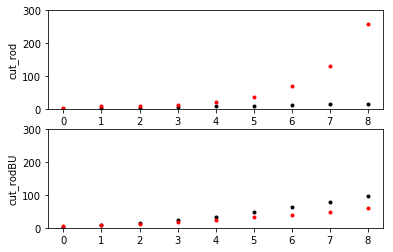

In [16]:
pl.figure(1)
x = np.arange(9)
res = exper_cut_rodR(10)
p = np.array(res[0])                #-> Arreglo con la cantidad de procesos realizados para cada arreglo (Negro)
t = np.array(res[1]) * 1e6      #-> Arreglo de tiempos de ejecucion en el ordenamiento de cada arreglo (Rojo)

pl.subplot(211)
pl.ylabel('cut_rod')
pl.ylim([0, 300])
pl.plot(x, p, 'k.', t, 'r.')



x = np.arange(9)
res = exper_cut_rodBUExper(10)
p = np.array(res[0])                #-> Arreglo con la cantidad de procesos realizados para cada arreglo (Negro)
t = np.array(res[1]) * 1e6          #-> Arreglo de tiempos de ejecucion en el ordenamiento de cada arreglo (Rojo)

pl.subplot(212)
pl.ylabel('cut_rodBU')
pl.ylim([0, 300])
pl.plot(x, p, 'k.', t, 'r.')

# PUNTO 3

Implemente, describa y analice un algoritmo de PD para calcular la distancia de edición entre dos cadenas. (Cormen, problem 15-5)

Este algoritmo tiene una complejidad de $O(n^2)$, En el, se usan tres posibles cambios a realizar, los cuales son sustictucion, cuando una letra puede ser cambiada por otra, isercion, cuando una letra debe ser añadida a la cadena y eliminacion cuando existen letras sobrantes, el algoritmo se basa en una matriz de $(n+1)$X$(m+1)$ de enteros, siendo estas las longitudes de cada palabra a comparar, la primera fila y columna son iniciadas con una secuencia de valores $1, 2, 3, 4,..., n$ y $1, 2, 3, 4,..., m$ respectivamente, despues de esto se empieza a llenar el resto de la matriz comparando caracter con caracter y sumando los costos de los 3 distintos cambios tomando en todos los casos el valor minimo, una vez la matriz ha sido completada, la distancia entre las dos palabras será la ultima casilla de la matriz.

In [17]:
def distancia(c1, c2):
    cost = 0
    m=len(c1)
    n=len(c2)
    mx = np.empty((m+1, n+1), dtype=np.int)

    for i in range(m+1):
        mx[i,0] = i
        
    for j in range(n+1):
        mx[0,j]=j
        
    for i in range(1, m+1):
        for j in range(1, n+1):
            if c1[i-1] == c2[j-1]:
                cost = 0
            else:
                cost = 1
            mx[i,j] = min(min(mx[i-1, j]+1, mx[i, j-1]+1), mx[i-1, j-1]+cost)
            
    return mx[i,j]

In [18]:
c1 = "Tarro"
c2 = "Carro"
print distancia(c1, c2)

1


# Punto 4
En el rio atrato hay n embarcaderos, en cada uno de ellos se puede alquilar un bote para realizar un viaje rio abajo a otro embarcadero. Existe una tabla de tarifas que indica el costo del viaje del embarcadero i al j, para i, j = 1,2,...,n  (i<j), puede pasar que un viaje de i a j sea más caro que una serie de viajes sucesivos intermedios, no hay un costo asociado a cambiar de bote en algún embarcadero. El problema consiste en diseñar un algoritmo de PD que determine el costo mínimo para cada par de puntos i,j.

In [19]:
def rio(src, dest, n, mat):
    for i in range(1, n):
        T[i,i] = 0
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            T[i,j] = minim(i, j, n, mat, T)
    
    return T[n,n]


def minim(src, dest, n, mat, T):
    aux = float('inf')
    for i in range(src+1, n+1):
        aux = min(aux, mat[src,i] + T[i,dest])
    
    return aux